## **Regression using Multi Layer Perceptron (Feed Forward Neural Network)**

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# Importing the dataset
from sklearn.datasets import fetch_california_housing

In [ ]:
# Displaying the dataset
house = fetch_california_housing()
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
type (house)

sklearn.utils.Bunch

In [ ]:
house['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
# Checking the shape
house['data'].shape

(20640, 8)

In [ ]:
house['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
# Defining the Feature sets
X = pd.DataFrame(house['data'], columns = house['feature_names'])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
# Defining the target

y = pd.DataFrame(house['target'], columns = house['target_names'])
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


### **Standardization of the Feature Set**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)
X_sc

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

### **Splitting the data to train and test**

In [ ]:
from sklearn.model_selection import train_test_split

X_sc_tr, X_sc_te, y_tr, y_te = train_test_split(X_sc, y, test_size = 0.2, random_state = 100)

In [ ]:
# Checking the shape of the train and test data
X_sc_tr.shape, X_sc_te.shape, y_tr.shape, y_te.shape


((16512, 8), (4128, 8), (16512, 1), (4128, 1))

###**Building the Model**

In [ ]:
mod_1 = tf.keras.Sequential()

# Adding the hidden layer
mod_1.add(tf.keras.layers.Dense(10, activation = 'relu'))

# We create the model in such a way that the no of units (neurons) in the hidden layers is greater than the input layer and the output layer.
# This is done to prevent the loss of data (data bottleneck).

# Adding the output layer
mod_1.add(tf.keras.layers.Dense(1))

# Since we have only one output, we take the no of units in the output layer to be 1.
# Basic purpose of the activation function is to take care of non-linearity of the input variable
# Activation function also helps in condensing the output.
# The activation function is differentiable and continuous.
# In case of regression problem, there is no need of activation function. There is no harm in adding the activation function to the regression problem but it will take more time
# for processing

###**Compiling the Model**

In [ ]:
mod_1.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mae']) # mae - Mean Absolute Error

###**Training the model**

Epoch 1/100
516/516 [==============================] - 1s 1ms/step - loss: 1.4703 - mae: 0.8726
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.6067 - mae: 0.5557
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4870 - mae: 0.4969
Epoch 4/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4398 - mae: 0.4740
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4244 - mae: 0.4658
Epoch 6/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4199 - mae: 0.4638
Epoch 7/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4147 - mae: 0.4598
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4104 - mae: 0.4570
Epoch 9/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4068 - mae: 0.4549
Epoch 10/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4038 - mae: 0.4537
Epoch 11/100
516/516 [=================

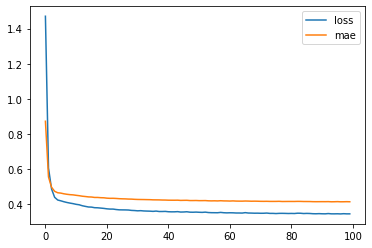

In [ ]:
tf.random.set_seed(100)
history = mod_1.fit(X_sc_tr, y_tr, epochs = 100)
hist = pd.DataFrame(history.history)
hist.plot();

###**Model Summary**

In [ ]:
mod_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 10)                  90        
                                                                 
 dense_1 (Dense)             (32, 1)                   11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


###**Plotting the model**

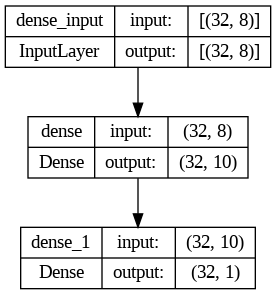

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(mod_1, show_shapes = True)

###**Evaluation of the model**

In [ ]:
test_mse, test_mae = mod_1.evaluate(X_sc_te, y_te)

129/129 [==============================] - 0s 1ms/step - loss: 0.3372 - mae: 0.4050


In [ ]:
print ('Test MSE:', test_mse)

Test MSE: 0.33719804883003235


**The training loss is 0.3457, while the test loss is 0.3372. There is no substantial difference and this rules out the cause of overfitting**.

In [ ]:
print('Test MAE:', test_mae)

Test MAE: 0.4050343930721283


**The training mae is 0.4145, while the test mae is 0.4050. There is no substantial difference and this rules out the cause of overfitting**

**We can conclude that the model is fit for use.**

###**Prediction using the model**

In [ ]:
y_pred = mod_1.predict(X_sc_te)
y_pred

129/129 [==============================] - 0s 1ms/step


array([[2.2436864],
       [1.5835466],
       [2.0373082],
       ...,
       [2.0046296],
       [0.7885281],
       [1.3467023]], dtype=float32)

In [ ]:
y_te

,MedHouseVal
8151,2.45300
53,1.04200
3039,1.46200
9484,1.54200
9307,3.24200
...,...
16733,1.17200
5264,5.00001
12374,2.39300
19662,0.85700


###**Improving the model**

In [ ]:
# Building the new model

mod_2 = tf.keras.Sequential()
mod_2.add(tf.keras.layers.Dense(10, activation = 'relu'))
mod_2.add(tf.keras.layers.Dense(10, activation = 'relu'))
mod_2.add(tf.keras.layers.Dense(1))

In [ ]:
# Compiling the new model

mod_2.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.MeanSquaredError(), metrics = ['mae'])

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 2.7105 - mae: 1.2261
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 0.5410 - mae: 0.5266
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4580 - mae: 0.4843
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4244 - mae: 0.4634
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4011 - mae: 0.4479
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3858 - mae: 0.4392
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3736 - mae: 0.4303
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3646 - mae: 0.4242
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3579 - mae: 0.4193
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3520 - mae: 0.4158
Epoch 11/100
516/516 [=================

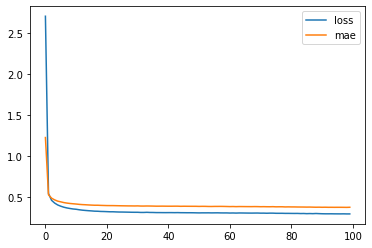

In [ ]:
# Training the new model

tf.random.set_seed(100)
history = mod_2.fit(X_sc_tr, y_tr, epochs = 100)
hist = pd.DataFrame(history.history)
hist.plot();

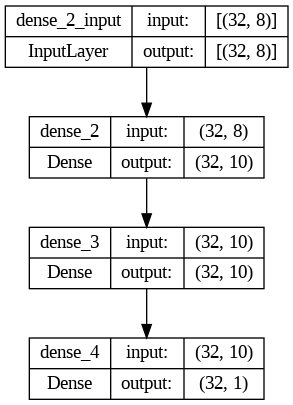

In [ ]:
# Plotting the new model

plot_model(mod_2, show_shapes = True)

In [ ]:
# Evaluating the new model

test_mse_new, test_mae_new = mod_2.evaluate(X_sc_te, y_te)

129/129 [==============================] - 0s 2ms/step - loss: 0.2787 - mae: 0.3627


In [ ]:
print ("New MSE:", test_mse_new)

New MSE: 0.2786981463432312


In [ ]:
print ("New MAE:", test_mae_new)

New MAE: 0.36270925402641296


**The training loss for the new model is 0.2787 while the training loss for the old model was 0.3372. Similarly, the test MAE for the new model is 0.3627 as opposed to the test MAE of 0.4050 for the old model. All in all the model has significantly improved.**

In [ ]:
# Prediction using the new model

y_pred_new = mod_2.predict(X_sc_te)
y_pred_new

129/129 [==============================] - 0s 1ms/step


array([[2.5251153 ],
       [1.3709631 ],
       [1.3894637 ],
       ...,
       [1.1808555 ],
       [0.63619465],
       [1.2219999 ]], dtype=float32)

In [44]:
# Constructing a DataFrame to see the predicted and the actual data for both old as well as new model

df = pd.DataFrame()
df['Actual Value'] = y_te
df['Predicted Value'] = y_pred
df['Difference'] = y_pred - y_te
df

,Actual Value,Predicted Value,Difference
8151,2.45300,2.243686,-0.209314
53,1.04200,1.583547,0.541547
3039,1.46200,2.037308,0.575308
9484,1.54200,1.260623,-0.281377
9307,3.24200,2.265723,-0.976277
...,...,...,...
16733,1.17200,2.008601,0.836601
5264,5.00001,5.689696,0.689686
12374,2.39300,2.004630,-0.388370
19662,0.85700,0.788528,-0.068472


In [45]:
df_new = pd.DataFrame()
df_new['Actual Value'] = y_te
df_new['Predicted Value'] = y_pred_new
df_new['Difference'] = y_pred_new - y_te
df_new

,Actual Value,Predicted Value,Difference
8151,2.45300,2.525115,0.072115
53,1.04200,1.370963,0.328963
3039,1.46200,1.389464,-0.072536
9484,1.54200,1.324323,-0.217677
9307,3.24200,2.510626,-0.731374
...,...,...,...
16733,1.17200,1.128938,-0.043062
5264,5.00001,5.095624,0.095614
12374,2.39300,1.180856,-1.212144
19662,0.85700,0.636195,-0.220805
